## Model training and testing

In [1]:
import joblib
import matplotlib.pyplot as plt
import sklearn
import numpy as np

from model_training import train_model
from model_training import load_data
from model_training import obtain_errors

from plots import plot_example_hist

In [3]:
# Train on generated data
set_name = 'training_set_207'
TRAIN_MODEL = False

if TRAIN_MODEL == True:
    train_model(set_name, MERGE=False)

In [4]:
estimator = joblib.load('estimator.pkl')

In [ ]:
#input_data, output_data = merge_data("data")
input_data, output_data = load_data("training_set_2084")
#"32 608 608 2 2"
print(input_data.shape) # [N_SAMPLE][OPTIC_FUNCT]
print(output_data.shape) # [N_SAMPLE][MAGNET ERROR]
#triplet_errors, arc_errors_b1, arc_errors_b2, mqt_errors_b1, mqt_errors_b2

In [8]:
pred_triplet, true_triplet, pred_arc, true_arc, pred_mqt, true_mqt = obtain_errors(input_data, output_data)

#pred_q1, true_q1 

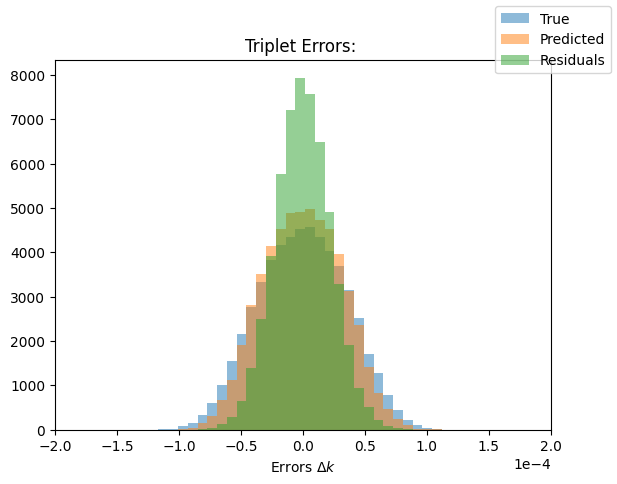

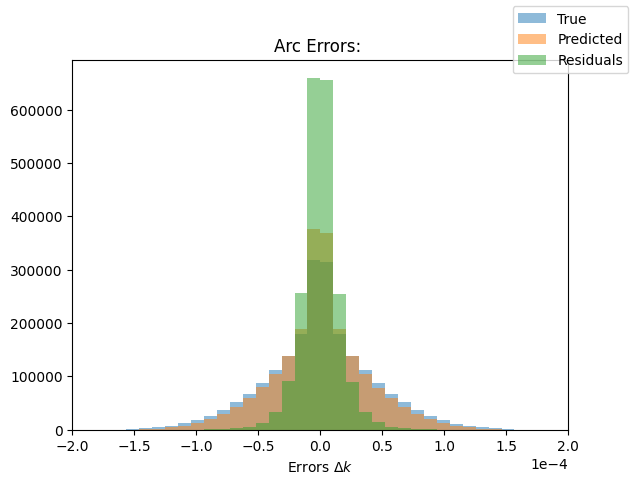

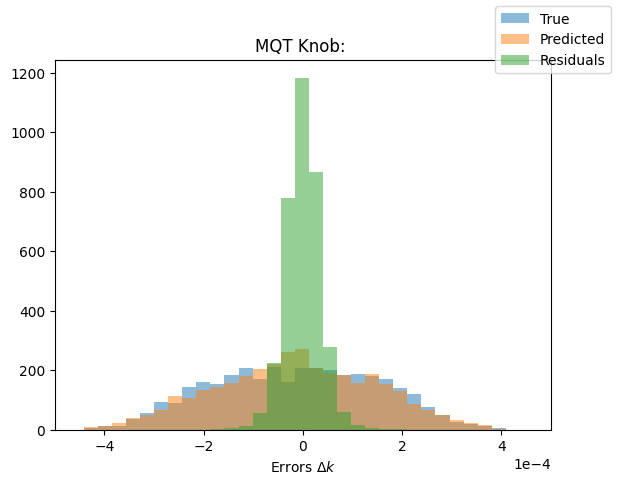

In [14]:
plot_example_hist()


#Example histogram for the triplet errors
errors = (("Triplet Errors: " ,pred_triplet, true_triplet), 
 ("Arc Errors: ", pred_arc, true_arc), 
 ("MQT Knob: ", pred_mqt, true_mqt))

#fig, axs = plt.subplots(3, figsize=(10,15))

for idx, (name, pred_error, true_error) in enumerate(errors):
    #ax = axs[idx]
    fig, ax = plt.subplots()
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    _, bins, _ = ax.hist(true_error, bins=30, alpha = 0.5,label="True")
    ax.hist(pred_error, bins=bins, alpha = 0.5, label="Predicted")
    ax.hist(pred_error-true_error, bins=bins, alpha=0.5, label="Residuals")
    ax.set_xlim(-0.0002, 0.0002)
    if name == "MQT Knob: ":
        ax.set_xlim(-0.0005, 0.0005)
    ax.set_title(f"{name}")
    ax.set_xlabel(r"Errors $\Delta k$")
    fig.legend()
    fig.show()

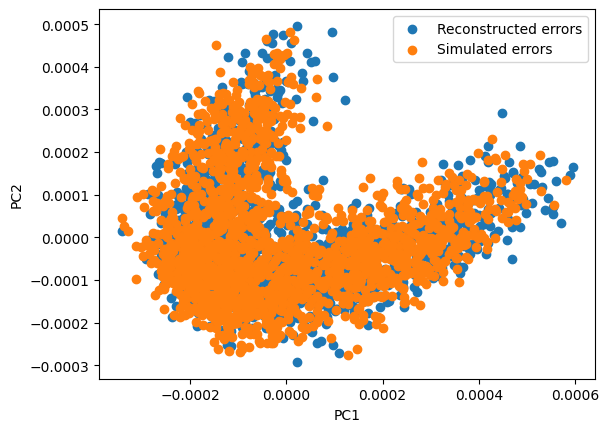

In [15]:
#PCA visualization of the simulated magnet errors and reconstruction, 
# for an unbiased regression a similar distribution is expected, for an 
# accurate regression the spread should be similar 

pca = sklearn.decomposition.PCA(n_components=2)
 
pred_data = estimator.predict(input_data)

pca.fit(output_data) # Fitting PCA decomposition to extract the most important components of the simulation data

pred_red_data = pca.transform(pred_data)
output_red_data = pca.transform(output_data)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(pred_red_data[:,0], pred_red_data[:,1], label="Reconstructed errors")
plt.scatter(output_red_data[:,0], output_red_data[:,1], label="Simulated errors")
plt.legend()

In [2]:
from madx_jobs import madx_ml_op
import matplotlib.pyplot as plt


In [3]:
mdx = madx_ml_op()
mdx.job_nominal2023()
nominal_twiss_b2 = mdx.table.twiss.dframe()
mdx.quit()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2023.03.29 15:35:32      +
  ++++++++++++++++++++++++++++++++++++++++++++
++++++ warning: macro redefined: coupling_knob
++++++ warning: macro redefined: match_tunes
++++++ warning: macro redefined: load_main_sequence
++++++ warning: macro redefined: coupling_knob
++++++ warning: macro redefined: match_tunes
++++++ warning: macro redefined: match_tunes_arc_squeeze
++++++ warning: macro redefined: load_average_error_table
++++++ warning: macro redefined: set_crossing_scheme_on
++++++ warning: macro redefined: set_default_crossing_scheme
++++++ warning: implicit element re-definition ignored: ip1
++++++ warning: implicit element re-definition ignored: mbas2.1r1
++++++ warning: implicit element re-definition ignored: tas.1r1
++++++ warning: implicit element re-definition ignored: mqx

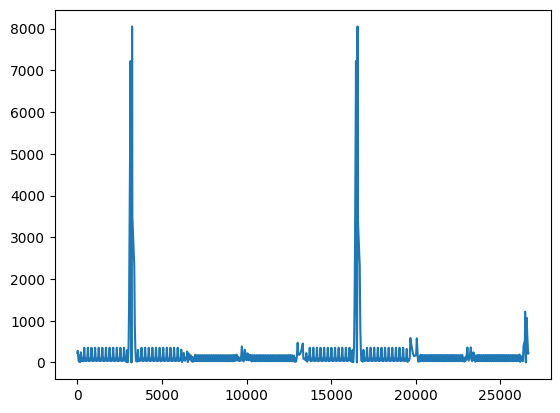

In [4]:
plt.plot(nominal_twiss_b2.s, nominal_twiss_b2.betx)

In [5]:
mdx = madx_ml_op()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2023.03.29 15:35:53      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [6]:
OPTICS_30CM_2023 = '/afs/cern.ch/user/a/aborjess/work/private/models/LHCB1/B1_30cm_flat/modifiers.madx'
index = 0
seed = 1000000

mdx.job_magneterrors_b1(OPTICS_30CM_2023, str(index), seed)
b1_tw_before_match = mdx.table.twiss.dframe() # Twiss before match
mdx.match_tunes_b1()

b1_tw_after_match = mdx.table.twiss.dframe()# Twiss after match
mdx.generate_twiss_train_b1()

twiss_data_b1 = mdx.table.twiss.dframe() # Relevant to training Twiss data
common_errors = mdx.table.cetab.dframe() # Errors for both beams, triplet errors
b1_errors = mdx.table.etabb1.dframe() # Table error for MQX magnets

mdx.job_magneterrors_b2(OPTICS_30CM_2023, str(index), seed)

b2_tw_before_match = mdx.table.twiss.dframe() # Twiss before match

mdx.match_tunes_b2()

b2_tw_after_match = mdx.table.twiss.dframe()# Twiss after match

mdx.generate_twiss_train_b2()

twiss_data_b2 = mdx.table.twiss.dframe() # Relevant to training Twiss data
b2_errors= mdx.table.etabb2.dframe() # Table error for MQX magnets    

++++++ warning: macro redefined: coupling_knob
++++++ warning: macro redefined: match_tunes
++++++ warning: macro redefined: load_main_sequence
++++++ warning: macro redefined: coupling_knob
++++++ warning: macro redefined: match_tunes
++++++ warning: macro redefined: match_tunes_arc_squeeze
++++++ warning: macro redefined: load_average_error_table
++++++ warning: macro redefined: set_crossing_scheme_on
++++++ warning: macro redefined: set_default_crossing_scheme
++++++ warning: implicit element re-definition ignored: ip1
++++++ warning: implicit element re-definition ignored: mbas2.1r1
++++++ warning: implicit element re-definition ignored: tas.1r1
++++++ warning: implicit element re-definition ignored: mqxa.1r1
++++++ warning: implicit element re-definition ignored: mcbxh.1r1
++++++ warning: implicit element re-definition ignored: mcbxv.1r1
++++++ warning: implicit element re-definition ignored: mqxb.a2r1
++++++ warning: implicit element re-definition ignored: mcbxh.2r1
++++++ warnin

In [8]:
print(len([*list(common_errors.name), *list(b1_errors.name), *list(b1_errors.name)]))

1632


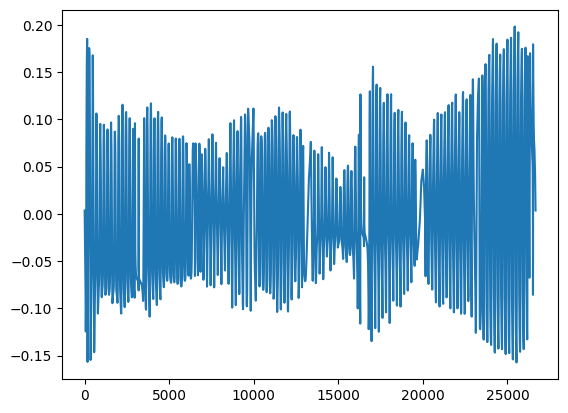

In [15]:
plt.plot(b2_tw_before_match.s, (b2_tw_before_match.betx-nominal_twiss_b2.betx)/nominal_twiss_b2.betx)

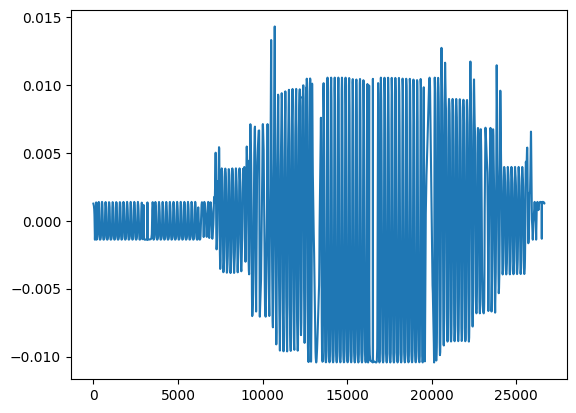

In [23]:
plt.plot(b2_tw_before_match.s, (b2_tw_after_match.betx-b2_tw_before_match.betx)/b2_tw_before_match.betx)

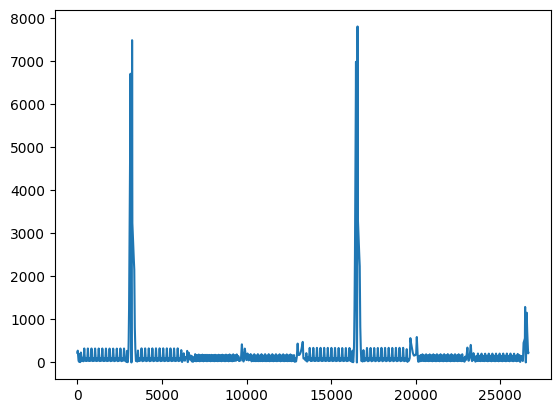

In [24]:
plt.plot(b2_tw_after_match.s, b2_tw_after_match.betx)

In [40]:
b1_errors = b1_errors.set_index("name", drop=False) 
common_errors = common_errors.set_index("name", drop=False) 
print(common_errors.k1l)

name
mqxa.3l2:1    -0.000032
mqxb.b2l2:1    0.000025
mqxb.a2l2:1    0.000022
mqxa.1l2:1    -0.000032
mqxa.1r2:1     0.000046
mqxb.a2r2:1   -0.000019
mqxb.b2r2:1   -0.000065
mqxa.3r2:1     0.000065
mqxa.3l5:1     0.000010
mqxb.b2l5:1   -0.000034
mqxb.a2l5:1   -0.000030
mqxa.1l5:1     0.000043
mqxa.1r5:1    -0.000033
mqxb.a2r5:1    0.000028
mqxb.b2r5:1    0.000040
mqxa.3r5:1    -0.000056
mqxa.3l8:1    -0.000044
mqxb.b2l8:1    0.000022
mqxb.a2l8:1    0.000050
mqxa.1l8:1    -0.000102
mqxa.1r8:1     0.000040
mqxb.a2r8:1   -0.000033
mqxb.b2r8:1   -0.000055
mqxa.3r8:1     0.000029
mqxa.3l1:1     0.000053
mqxb.b2l1:1   -0.000039
mqxb.a2l1:1   -0.000039
mqxa.1l1:1     0.000033
mqxa.1r1:1    -0.000033
mqxb.a2r1:1    0.000057
mqxb.b2r1:1    0.000045
mqxa.3r1:1    -0.000050
Name: k1l, dtype: float64


(array([  4.,  10.,  31.,  70., 114., 407.,  95.,  37.,  20.,  12.]),
 array([-1.47268554e-04, -1.19435126e-04, -9.16016979e-05, -6.37682697e-05,
        -3.59348416e-05, -8.10141344e-06,  1.97320147e-05,  4.75654428e-05,
         7.53988710e-05,  1.03232299e-04,  1.31065727e-04]),
 <BarContainer object of 10 artists>)

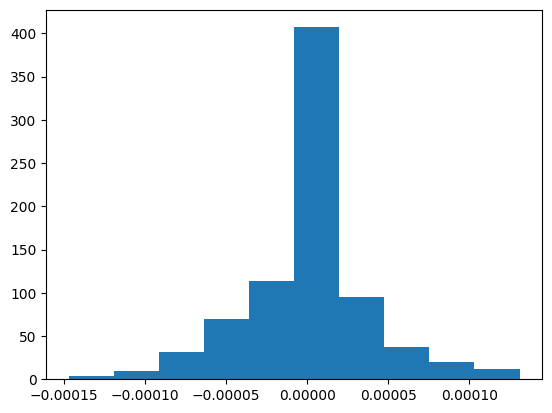

In [43]:
plt.hist(b1_errors.k1l)

(array([1., 0., 3., 4., 8., 0., 1., 5., 6., 4.]),
 array([-1.02048103e-04, -8.52959564e-05, -6.85438099e-05, -5.17916634e-05,
        -3.50395170e-05, -1.82873705e-05, -1.53522400e-06,  1.52169225e-05,
         3.19690690e-05,  4.87212154e-05,  6.54733619e-05]),
 <BarContainer object of 10 artists>)

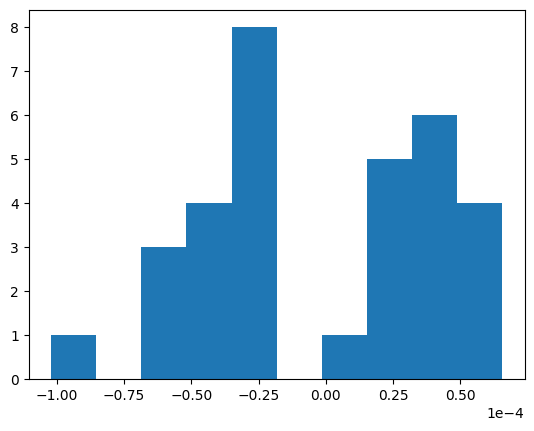

In [35]:
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.hist(np.array(common_errors.k1l))

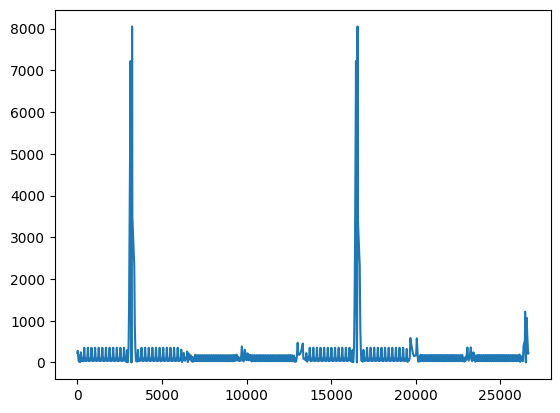

In [25]:
plt.plot(nominal_twiss_b2.s, nominal_twiss_b2.betx)

In [30]:
save_np_errors_tfs([0 for i in range(1250)])

              names  k1l
0        mqxa.3l2:1    0
1       mqxb.b2l2:1    0
2       mqxb.a2l2:1    0
3        mqxa.1l2:1    0
4        mqxa.1r2:1    0
...             ...  ...
1245  mqy.a4l8.b2:1    0
1246  mqy.a4r8.b2:1    0
1247  mqy.b4r8.b2:1    0
1248          MQTB1    0
1249          MQTB2    0

[1250 rows x 2 columns]
              names  k1l
0        mqxa.3l2:1    0
1       mqxb.b2l2:1    0
2       mqxb.a2l2:1    0
3        mqxa.1l2:1    0
4        mqxa.1r2:1    0
...             ...  ...
1245  mqy.a4l8.b2:1    0
1246  mqy.a4r8.b2:1    0
1247  mqy.b4r8.b2:1    0
1248          MQTB1    0
1249          MQTB2    0

[1250 rows x 2 columns]


In [5]:
a = [0]
b = []

if (len(a) or len(b)) != 2:
    print('err')

err


In [7]:
if 20 and 10 < 30:
    print(22)

22


In [9]:
if 65.32659374288653 and 14.987567001569397 < 30:
    print(2)

2
